# Business Problem/Goal of the ML project:

To Determine which product should be given to customer or selection of product by customer is lengthy and confusing process in practice. The older process leads to manual intervention in result of threats and challenges like bad product selection, exra time taken, overwait, overprocessing, duplicasy of works, waiting time in the cycle. To overcome from these challenges and threats using machine learning technique to create product selection ML model to select correct product with the help of given features.

# Tools Setup for the Business Problem:

Import All required initial libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection by Load sample dataset

In [2]:
path = r"Product_data_Short.csv"
df = pd.read_csv(path)

In [3]:
df.head()

,Location,Region,Construction,Earthquake,Flood,Product
0,Urban,East,Frame,N,N,Standard
1,Urban,East,Fire Resist,Y,Y,Basic
2,Rural,Midwest,Frame,N,N,Basic
3,Urban,East,Frame,Y,Y,Standard
4,Urban,East,Masonry,N,N,Premium


In [4]:
df["Product"]

0      Standard
1         Basic
2         Basic
3      Standard
4       Premium
         ...   
495       Basic
496       Basic
497    Standard
498    Standard
499    Standard
Name: Product, Length: 500, dtype: object

# Exploratory Data Analysis With the help of Numpy, Pandas, Matplotlib, Seaborn

In [5]:
df.shape

(500, 6)

In [6]:
df.tail()

,Location,Region,Construction,Earthquake,Flood,Product
495,Urban,Northeast,Fire Resist,Y,Y,Basic
496,Urban,Central,Frame,N,N,Basic
497,Urban,East,Frame,Y,Y,Standard
498,Urban,East,Frame,Y,Y,Standard
499,Urban,Midwest,Frame,N,N,Standard


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Location      500 non-null    object
 1   Region        500 non-null    object
 2   Construction  500 non-null    object
 3   Earthquake    500 non-null    object
 4   Flood         500 non-null    object
 5   Product       500 non-null    object
dtypes: object(6)
memory usage: 23.6+ KB


In [8]:
df.describe()

,Location,Region,Construction,Earthquake,Flood,Product
count,500,500,500,500,500,500
unique,2,4,4,2,2,3
top,Urban,East,Frame,Y,N,Standard
freq,405,337,322,256,251,229


# Data Visualization with the help of the Matplotlib/ Seaborn

C:\Users\Om\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product', ylabel='count'>

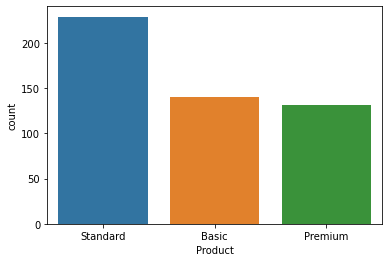

In [9]:
sns.countplot(df['Product'])

C:\Users\Om\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product', ylabel='count'>

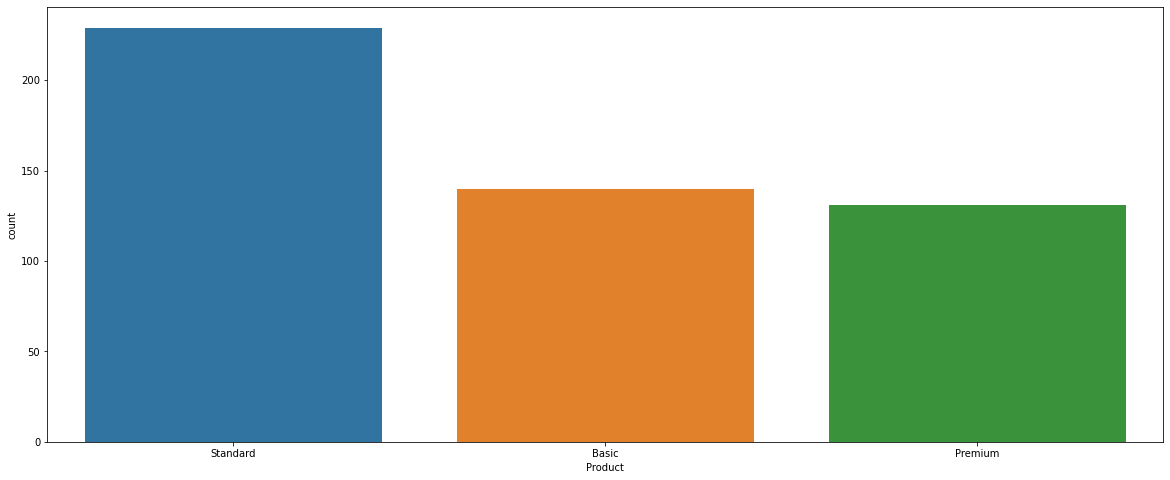

In [10]:
plt.figure(figsize = (20,8))
sns.countplot(df['Product'])

In [11]:
df['Product'].values

array(['Standard', 'Basic', 'Basic', 'Standard', 'Premium', 'Standard',
       'Premium', 'Basic', 'Standard', 'Premium', 'Standard', 'Standard',
       'Premium', 'Premium', 'Premium', 'Standard', 'Basic', 'Premium',
       'Premium', 'Standard', 'Basic', 'Standard', 'Standard', 'Standard',
       'Basic', 'Standard', 'Premium', 'Premium', 'Standard', 'Basic',
       'Standard', 'Premium', 'Standard', 'Standard', 'Basic', 'Standard',
       'Basic', 'Standard', 'Basic', 'Standard', 'Basic', 'Standard',
       'Standard', 'Standard', 'Standard', 'Premium', 'Standard',
       'Premium', 'Standard', 'Premium', 'Premium', 'Standard', 'Basic',
       'Basic', 'Premium', 'Basic', 'Standard', 'Premium', 'Premium',
       'Standard', 'Basic', 'Premium', 'Premium', 'Standard', 'Basic',
       'Standard', 'Standard', 'Basic', 'Premium', 'Standard', 'Premium',
       'Standard', 'Basic', 'Basic', 'Standard', 'Premium', 'Standard',
       'Basic', 'Premium', 'Basic', 'Premium', 'Premium', 'Premiu

In [12]:
df.isnull().sum()

Location        0
Region          0
Construction    0
Earthquake      0
Flood           0
Product         0
dtype: int64

In [13]:
df['Product'].value_counts()

Standard    229
Basic       140
Premium     131
Name: Product, dtype: int64

# Data Pre-processing

# Creating DataFrame with the help of Pandas and Numpy

In [14]:
order_label = {'Basic':3, 'Standard':2, 'Premium':1}

In [15]:
df['Product_label'] = df['Product'].map(order_label)

In [16]:
df['Product']

0      Standard
1         Basic
2         Basic
3      Standard
4       Premium
         ...   
495       Basic
496       Basic
497    Standard
498    Standard
499    Standard
Name: Product, Length: 500, dtype: object

In [17]:
df.head()

,Location,Region,Construction,Earthquake,Flood,Product,Product_label
0,Urban,East,Frame,N,N,Standard,2
1,Urban,East,Fire Resist,Y,Y,Basic,3
2,Rural,Midwest,Frame,N,N,Basic,3
3,Urban,East,Frame,Y,Y,Standard,2
4,Urban,East,Masonry,N,N,Premium,1


In [18]:
df = df.drop(['Product'],axis=1)

In [19]:
df.head()

,Location,Region,Construction,Earthquake,Flood,Product_label
0,Urban,East,Frame,N,N,2
1,Urban,East,Fire Resist,Y,Y,3
2,Rural,Midwest,Frame,N,N,3
3,Urban,East,Frame,Y,Y,2
4,Urban,East,Masonry,N,N,1


In [20]:
df_dummy = pd.get_dummies(df,drop_first=True)

In [21]:
df_dummy.head()

,Product_label,Location_Urban,Region_East,Region_Midwest,Region_Northeast,Construction_Frame,Construction_Masonry,Construction_Metal Clad,Earthquake_Y,Flood_Y
0,2,1,1,0,0,1,0,0,0,0
1,3,1,1,0,0,0,0,0,1,1
2,3,0,0,1,0,1,0,0,0,0
3,2,1,1,0,0,1,0,0,1,1
4,1,1,1,0,0,0,1,0,0,0


In [22]:
df_dummy.shape

(500, 10)

In [23]:
df_dummy.describe()

,Product_label,Location_Urban,Region_East,Region_Midwest,Region_Northeast,Construction_Frame,Construction_Masonry,Construction_Metal Clad,Earthquake_Y,Flood_Y
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2.018000,0.810000,0.674000,0.216000,0.068000,0.644000,0.216000,0.062000,0.512000,0.498000
std,0.736724,0.392694,0.469217,0.411926,0.251998,0.479295,0.411926,0.241397,0.500357,0.500497
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
df_dummy.columns

Index(['Product_label', 'Location_Urban', 'Region_East', 'Region_Midwest',
       'Region_Northeast', 'Construction_Frame', 'Construction_Masonry',
       'Construction_Metal Clad', 'Earthquake_Y', 'Flood_Y'],
      dtype='object')

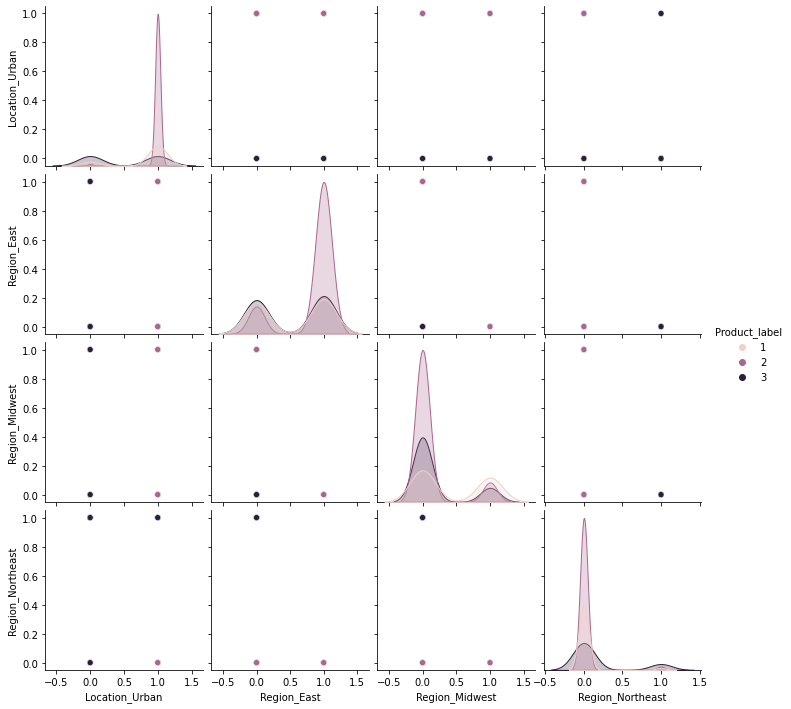

In [25]:
sns.pairplot(df_dummy, hue = 'Product_label', 
             vars = [ 'Location_Urban', 'Region_East', 'Region_Midwest',
       'Region_Northeast'] )

C:\Users\Om\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Om\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Om\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Om\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


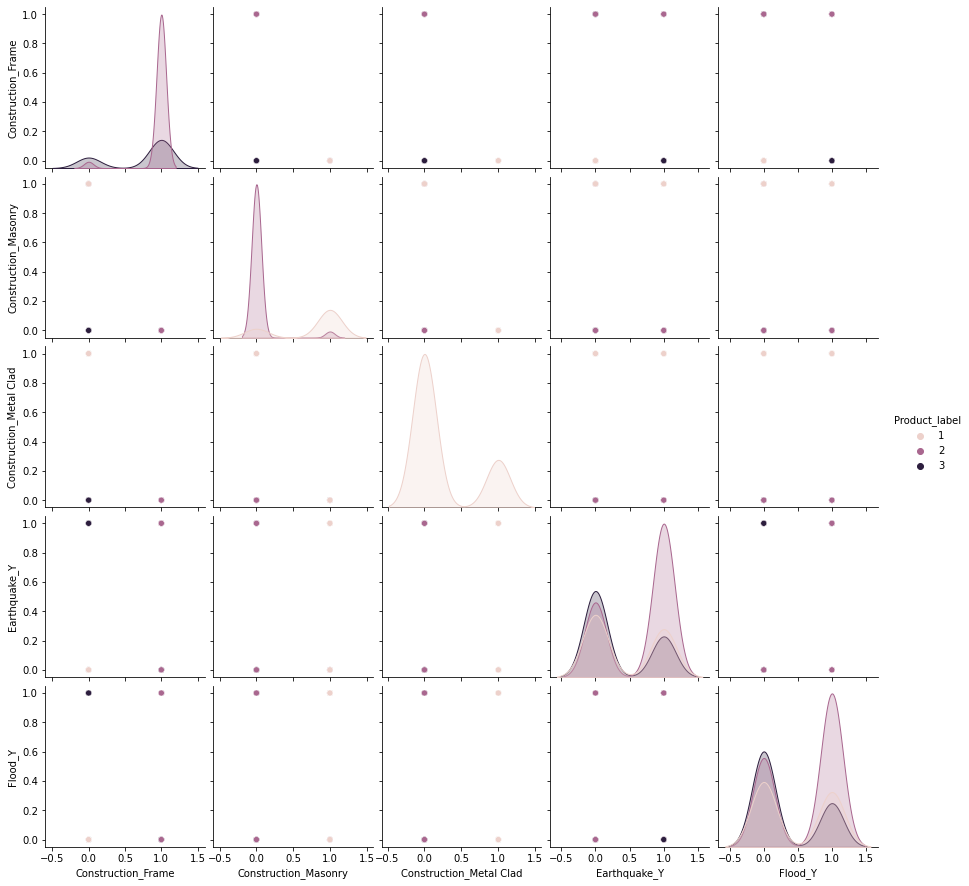

In [26]:
sns.pairplot(df_dummy, hue = 'Product_label', 
             vars = [ 'Construction_Frame', 'Construction_Masonry',
       'Construction_Metal Clad', 'Earthquake_Y', 'Flood_Y'] )

<AxesSubplot:>

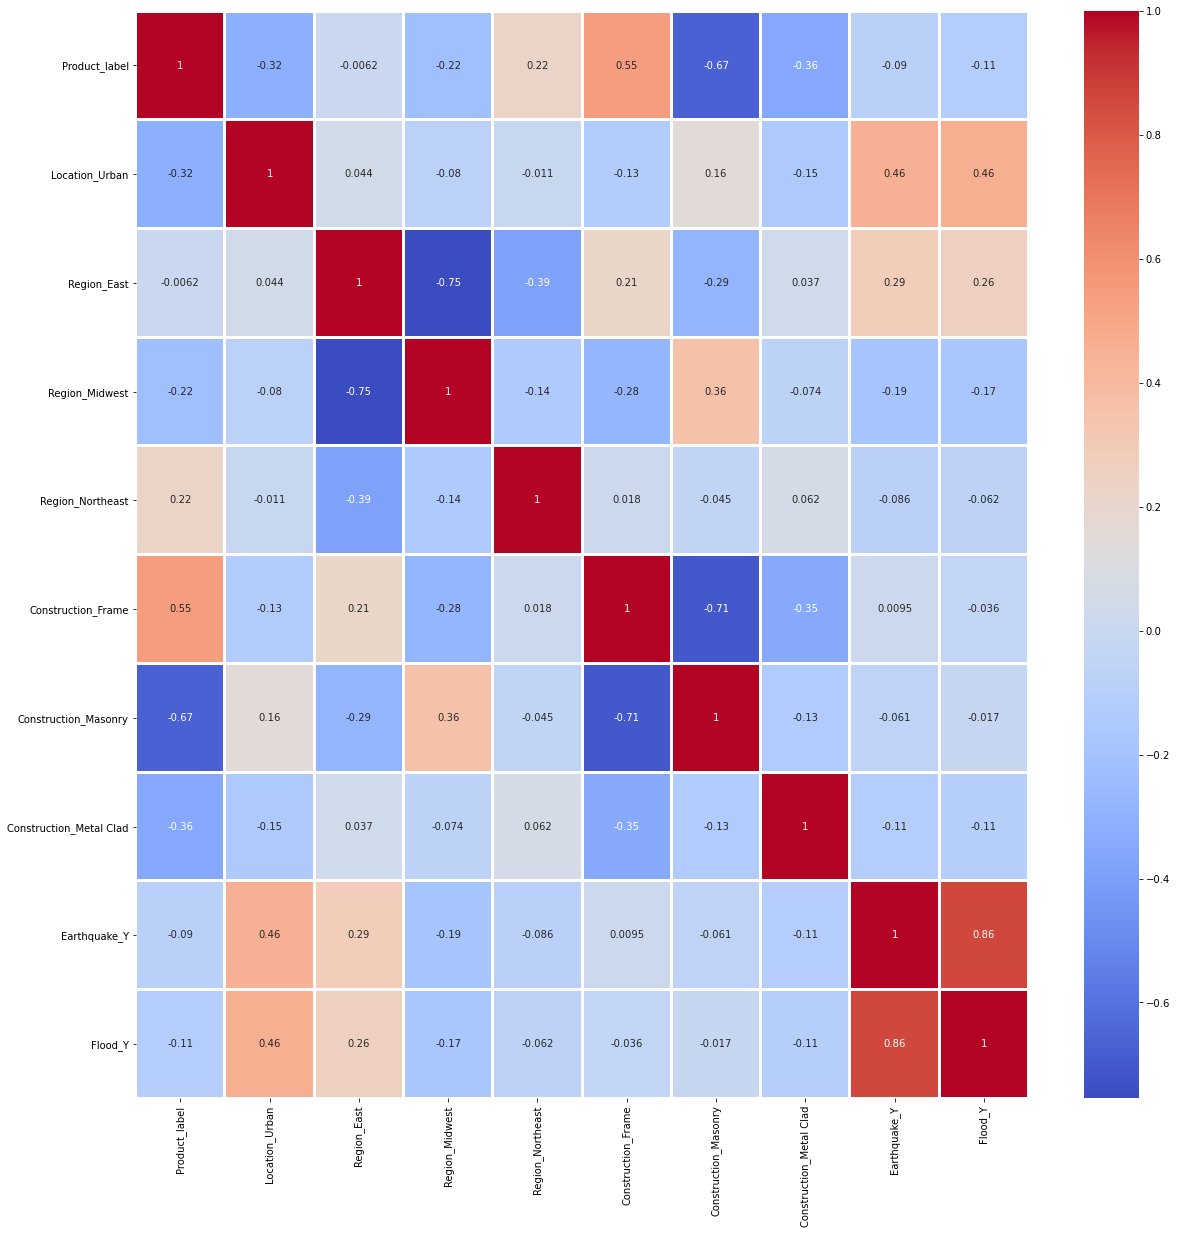

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(df_dummy.corr(), annot = True, cmap ='coolwarm', linewidths=2)

# Finding the co-relation between the Features and Target

In [28]:
df_dummy.corr()

,Product_label,Location_Urban,Region_East,Region_Midwest,Region_Northeast,Construction_Frame,Construction_Masonry,Construction_Metal Clad,Earthquake_Y,Flood_Y
Product_label,1.000000,-0.320648,-0.006180,-0.224150,0.220076,0.545991,-0.666585,-0.355609,-0.090289,-0.111318
Location_Urban,-0.320648,1.000000,0.043831,-0.080279,-0.010936,-0.125852,0.155107,-0.150308,0.455292,0.461996
Region_East,-0.006180,0.043831,1.000000,-0.754727,-0.388390,0.213613,-0.288155,0.037261,0.285575,0.257488
Region_Midwest,-0.224150,-0.080279,-0.754727,1.000000,-0.141780,-0.279660,0.362245,-0.074487,-0.187615,-0.172865
Region_Northeast,0.220076,-0.010936,-0.388390,-0.141780,1.000000,0.018318,-0.045252,0.062329,-0.085953,-0.062476
Construction_Frame,0.545991,-0.125852,0.213613,-0.279660,0.018318,1.000000,-0.705971,-0.345790,0.009493,-0.036390
Construction_Masonry,-0.666585,0.155107,-0.288155,0.362245,-0.045252,-0.705971,1.000000,-0.134947,-0.061216,-0.017341
Construction_Metal Clad,-0.355609,-0.150308,0.037261,-0.074487,0.062329,-0.345790,-0.134947,1.000000,-0.114017,-0.106787
Earthquake_Y,-0.090289,0.455292,0.285575,-0.187615,-0.085953,0.009493,-0.061216,-0.114017,1.000000,0.860351
Flood_Y,-0.111318,0.461996,0.257488,-0.172865,-0.062476,-0.036390,-0.017341,-0.106787,0.860351,1.000000


In [29]:
corr_matrix = df_dummy.corr()

In [30]:
corr_matrix["Product_label"].sort_values(ascending=True)

Construction_Masonry      -0.666585
Construction_Metal Clad   -0.355609
Location_Urban            -0.320648
Region_Midwest            -0.224150
Flood_Y                   -0.111318
Earthquake_Y              -0.090289
Region_East               -0.006180
Region_Northeast           0.220076
Construction_Frame         0.545991
Product_label              1.000000
Name: Product_label, dtype: float64

In [31]:
x = df_dummy.drop('Product_label',axis = 'columns')

In [32]:
x.head()

,Location_Urban,Region_East,Region_Midwest,Region_Northeast,Construction_Frame,Construction_Masonry,Construction_Metal Clad,Earthquake_Y,Flood_Y
0,1,1,0,0,1,0,0,0,0
1,1,1,0,0,0,0,0,1,1
2,0,0,1,0,1,0,0,0,0
3,1,1,0,0,1,0,0,1,1
4,1,1,0,0,0,1,0,0,0


In [33]:
y = df_dummy.Product_label

In [34]:
y.head()

0    2
1    3
2    3
3    2
4    1
Name: Product_label, dtype: int64

# Process to make data ready for Training and Testing

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2, stratify=y, random_state=50 )

In [37]:
x_train.shape

(400, 9)

In [38]:
x_test.shape

(100, 9)

In [39]:
y_train.shape

(400,)

In [40]:
y_test.shape

(100,)

In [41]:
y_train.value_counts()

2    183
3    112
1    105
Name: Product_label, dtype: int64

In [42]:
y_test.value_counts()

2    46
3    28
1    26
Name: Product_label, dtype: int64

# Step to Select possible Model's Training, Testing and Cross Validation for selected Model

# RandomForestClassifier

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
scores = cross_val_score(RandomForestClassifier(n_estimators=50), x, y, cv=5 )
scores.mean()

0.986

# DecisionTreeClassifier

In [44]:
from sklearn.tree import DecisionTreeClassifier

scores = cross_val_score(DecisionTreeClassifier(), x, y, cv=5 )
scores.mean()

0.992

# BaggingClassifier

In [45]:
from sklearn.ensemble import BaggingClassifier
bag_model = BaggingClassifier( base_estimator=DecisionTreeClassifier(),
                            n_estimators=50,
                            max_samples=0.8,
                            oob_score=True,
                            random_state=0                            
                           )
scores = cross_val_score(bag_model, x, y, cv=5 )
scores.mean()

0.992

In [46]:
bag_cls = BaggingClassifier( base_estimator=DecisionTreeClassifier(),
                            n_estimators=50,
                            max_samples=0.8,
                            oob_score=True,
                            random_state=0                            
                           )
bag_cls.fit(x_train, y_train)
bag_cls.oob_score_

0.995

In [47]:
bag_cls.score(x_test, y_test)

0.98

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [49]:
y_pred_bag_cls = bag_cls.predict(x_test)
accuracy_score(y_test, y_pred_bag_cls)

0.98

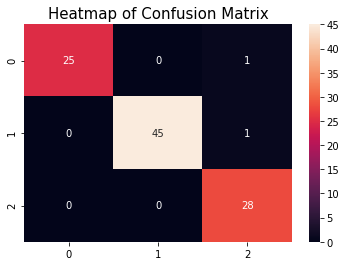

In [50]:
cm = confusion_matrix(y_test, y_pred_bag_cls)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

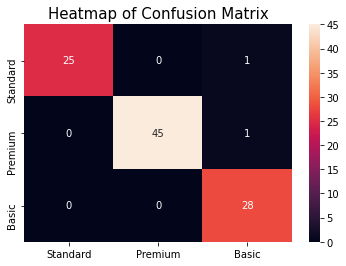

In [51]:
cm = confusion_matrix(y_test, y_pred_bag_cls)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True,xticklabels = ['Standard', 'Premium', 'Basic'], yticklabels = ['Standard', 'Premium', 'Basic'])
plt.show()


In [52]:
y_test.head().values

array([2, 2, 3, 2, 2], dtype=int64)

In [53]:
print(classification_report(y_test, y_pred_bag_cls))

              precision    recall  f1-score   support

           1       1.00      0.96      0.98        26
           2       1.00      0.98      0.99        46
           3       0.93      1.00      0.97        28

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [54]:
#order_label2 = ['Basic', 'Standard', 'Premium']
order_label2 = {'Basic':3, 'Standard':2, 'Premium':1}

In [55]:
print(classification_report(y_test, y_pred_bag_cls,target_names = ['Standard', 'Premium', 'Basic']))

              precision    recall  f1-score   support

    Standard       1.00      0.96      0.98        26
     Premium       1.00      0.98      0.99        46
       Basic       0.93      1.00      0.97        28

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



# Best Model Deployment with the help of Pickle
# Dump the best Model with all waights and values in binary

In [56]:
## Pickle
import pickle
 
# save model
pickle.dump(bag_cls, open('Product_Selection_Model', 'wb'))
 


# Load the Model with dump file and Prediction with the help of Model

In [57]:
# load model
New_Product_Selection_model = pickle.load(open('Product_Selection_Model', 'rb'))
 
# predict the output
y_pred_model = New_Product_Selection_model.predict(x_test)
 
# confusion matrix
print('Confusion matrix of New_Product_Selection_model: \n',confusion_matrix(y_test, y_pred_model),'\n')
 
# show the accuracy
print('Accuracy of New_Product_Selection_model = ',accuracy_score(y_test, y_pred_model))

Confusion matrix of New_Product_Selection_model: 
 [[25  0  1]
 [ 0 45  1]
 [ 0  0 28]] 

Accuracy of New_Product_Selection_model =  0.98


# After Model Deployment need to Monitor the Model and maintain necessary retrainings to achive maximum accuracy.

### Conclusion: With the help of ML Model we can determine and Select the best product. This will help to eliminate the older lengthy processes which was in practice. With the help of ML Model we can reduce the manual intervention and reduce the threats and challenges like wrong product slection, exra time taken, overwait, overprocessing, duplicasy of works, waiting time in the cycle.

In [78]:
def feature_pipeline():
    try:
        #INPUT FROM USER
        
        # feature_list = Location_Urban	
        # Region_East	 Region_Midwest 	 Region_Northeast	
        # Construction_Frame	Construction_Masonry	Construction_Metal Clad 	
        # Earthquake_Y	Flood_Y
        
        feature_list = ['Location_Urban', 'Region_East', 'Region_Midwest',
                        'Region_Northeast', 'Construction_Frame', 'Construction_Masonry',
                        'Construction_Metal_Clad', 'Earthquake_Y', 'Flood_Y']
        input_list = []
        
        for i in feature_list:
            new_feat = int(input(f"Please enter the {i} details. \nFor 'Yes' please enter 1 \nFor 'No' please enter 0 : "))
            
            input_list.append(new_feat)
        
    
        input_df = pd.DataFrame([input_list])
        order_label2 = {3:'Basic', 2:'Standard', 1:'Premium'}

        # load model
        New_Product_Selection_model = pickle.load(open('Product_Selection_Model', 'rb'))

        # predict the output
        y_pred_model = New_Product_Selection_model.predict(input_df)



        # print output
        print('New_Product_Selection by model: *',order_label2[y_pred_model[0]],'*'%colors)
 

    except Exception as e:
        print(e)




In [77]:
feature_pipeline()

Please enter the Location_Urban details: 0
Please enter the Region_East details: 0
Please enter the Region_Midwest details: 1
Please enter the Region_Northeast details: 0
Please enter the Construction_Frame details: 1
Please enter the Construction_Masonry details: 0
Please enter the Construction_Metal_Clad details: 0
Please enter the Earthquake_Y details: 0
Please enter the Flood_Y details: 0
New_Product_Selection_model:  Basic


In [79]:
feature_pipeline()

Please enter the Location_Urban details. 
For 'Yes' please enter 1 
For 'No' please enter 0 : 1
Please enter the Region_East details. 
For 'Yes' please enter 1 
For 'No' please enter 0 : 1
Please enter the Region_Midwest details. 
For 'Yes' please enter 1 
For 'No' please enter 0 : 0
Please enter the Region_Northeast details. 
For 'Yes' please enter 1 
For 'No' please enter 0 : 0
Please enter the Construction_Frame details. 
For 'Yes' please enter 1 
For 'No' please enter 0 : 0
Please enter the Construction_Masonry details. 
For 'Yes' please enter 1 
For 'No' please enter 0 : 1
Please enter the Construction_Metal_Clad details. 
For 'Yes' please enter 1 
For 'No' please enter 0 : 0
Please enter the Earthquake_Y details. 
For 'Yes' please enter 1 
For 'No' please enter 0 : 0
Please enter the Flood_Y details. 
For 'Yes' please enter 1 
For 'No' please enter 0 : 0
New_Product_Selection_model:  Premium
